In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import uuid

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.constants import R_earth
from astropy.coordinates import SkyCoord, Distance, get_sun
from astropy.time import Time, TimeDelta
from pandoravisibility import Visibility, analyze_yearly_visibility, plot_yearly_visibility, plot_visibility_summary

from astropy.visualization import time_support

from commissioningscheduler.roll import calculate_roll

In [3]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Set max column width to None to prevent truncation of long cell content
pd.set_option('display.max_colwidth', None)

In [4]:
line1 = "1 99152U 80229J   26027.93862269  .00000000  00000-0  37770-3 0    09"
line2 = "2 99152  97.7998  28.8325 0004359 216.6805  45.1895 14.87755168    08"

In [8]:
vis = Visibility(line1, line2, earthlimb_min=30*u.deg)

In [26]:
# Define start and stop times
tstart = Time("2026-01-24T22:00:00.000")
tstop = Time("2026-01-25T12:00:00.000")  # Example stop time

# Calculate times with a step of 1 minute
deltas = np.arange(0, (tstop - tstart).to_value(u.min), 1) * u.min
times = tstart + TimeDelta(deltas)

# Use these times with your Visibility module
state = vis.get_state(times)

Let's try a primary target first.

In [43]:
# HD 73583 from Gaia DR3:
target_coord = SkyCoord(
    ra=129.68829349261745 * u.deg,
    dec=-13.256521320044767 * u.deg,
    pm_ra_cosdec=-63.831047412374296 * u.mas / u.year,
    pm_dec=38.481540014954675 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=31.656880455652196 * u.mas, allow_negative=True),
    radial_velocity=20.455652 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

129.68811026981174
-13.256413804588126


Now an occultation target.

In [44]:
# TOI-431 from Gaia DR3:
occ_coord = SkyCoord(
    ra=83.26925287515645 * u.deg,
    dec=-26.72384884501141 * u.deg,
    pm_ra_cosdec=16.88616198889951 * u.mas / u.year,
    pm_dec=150.77881187412743 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=30.65166867430715 * u.mas, allow_negative=True),
    radial_velocity=48.664806 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
occ_vis = vis.get_visibility(occ_coord, times)

print(occ_coord.ra.degree)
print(occ_coord.dec.degree)

83.2693056956795
-26.723427580616182


In [45]:
print(len(times))
print(len(targ_vis))

1252
1252


In [50]:
df = pd.DataFrame({'time': times, 'HD 73583': targ_vis, 'TOI-431': occ_vis})

In [51]:
print(df)

                         time  HD 73583  TOI-431
0     2026-01-21T19:49:00.000      True     True
1     2026-01-21T19:50:00.000      True     True
2     2026-01-21T19:51:00.000      True     True
3     2026-01-21T19:52:00.000      True     True
4     2026-01-21T19:53:00.000      True     True
5     2026-01-21T19:54:00.000      True     True
6     2026-01-21T19:55:00.000      True     True
7     2026-01-21T19:56:00.000      True     True
8     2026-01-21T19:57:00.000     False     True
9     2026-01-21T19:58:00.000     False     True
10    2026-01-21T19:59:00.000     False     True
11    2026-01-21T20:00:00.000     False     True
12    2026-01-21T20:01:00.000     False     True
13    2026-01-21T20:02:00.000     False     True
14    2026-01-21T20:03:00.000     False     True
15    2026-01-21T20:04:00.000     False     True
16    2026-01-21T20:05:00.000     False     True
17    2026-01-21T20:06:00.000     False     True
18    2026-01-21T20:07:00.000     False     True
19    2026-01-21T20:

In [54]:
df.to_csv('/Users/bhord/research/pandora/commissioning/vis_files/20260121_vis.csv', index=False)

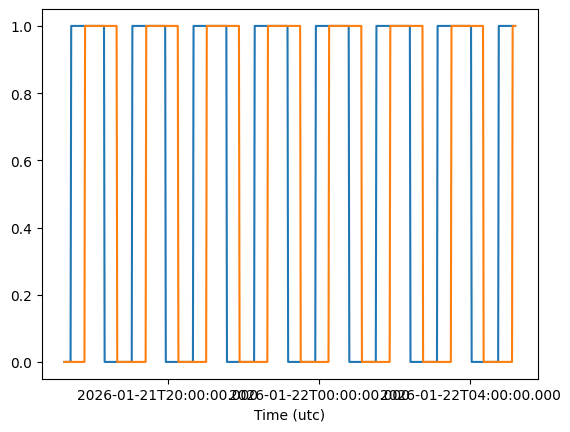

In [54]:
with time_support():
    plt.plot(times, targ_vis)
    plt.plot(times, occ_vis)
    plt.show();

In [55]:
str(uuid.uuid4())

'480cae19-3c2e-46b4-aef6-1d276ae58408'

In [62]:
# HD 73583
calculate_roll(
    ra=129.68811035673298,
    dec=-13.256413855593706,
    obs_time=Time('2026-01-22T00:36:00Z', format='isot', scale='utc')
)

np.float64(9.948242756284003)

In [52]:
# TOI-431
calculate_roll(
    ra=83.26925287515645,
    dec=-26.72384884501141,
    obs_time=Time('2026-01-21T19:49:00Z', format='isot', scale='utc')
)

np.float64(315.7375484758317)

Passes on Jan 20, 2026:

In [ ]:
PANDORA	Svalbard Station	SG127	2026-01-20T13:41:30Z	2026-01-20T13:51:00Z	570	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-20T15:17:50Z	2026-01-20T15:27:10Z	560	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-20T16:55:00Z	2026-01-20T17:03:20Z	500	N/A	-1
PANDORA	Troll Station	TR20	2026-01-20T17:51:50Z	2026-01-20T18:00:20Z	510	N/A	-1
PANDORA	Troll Station	TR20	2026-01-20T19:27:50Z	2026-01-20T19:36:30Z	520	N/A	-1
PANDORA	Troll Station	TR20	2026-01-20T21:03:40Z	2026-01-20T21:11:30Z	470	N/A	-1
PANDORA	Troll Station	TR20	2026-01-21T00:13:40Z	2026-01-21T00:21:00Z	440	N/A	-1
PANDORA	Troll Station	TR20	2026-01-21T01:47:30Z	2026-01-21T01:56:30Z	540	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-21T02:43:00Z	2026-01-21T02:50:00Z	420	N/A	-1
PANDORA	Troll Station	TR20	2026-01-21T03:22:50Z	2026-01-21T03:32:20Z	570	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-21T04:19:10Z	2026-01-21T04:28:00Z	530	N/A	-1
PANDORA	Troll Station	TR20	2026-01-21T04:59:20Z	2026-01-21T05:08:20Z	540	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-21T05:55:20Z	2026-01-21T06:04:50Z	570	N/A	-1

### Testing 3I/ATLAS

In [7]:
# Define start and stop times
tstart = Time("2026-01-21T18:04:00.000")
tstop = Time("2026-01-21T19:04:00.000")  # Example stop time

# Calculate times with a step of 1 minute
deltas = np.arange(0, (tstop - tstart).to_value(u.min), 1) * u.min
times = tstart + TimeDelta(deltas)

# Use these times with your Visibility module
state = vis.get_state(times)

3I/ATLAS start RA/Dec

In [9]:
# 3I/ATLAS from JPL Horizons
target_coord = SkyCoord(
    ra=124.54983 * u.deg,
    dec=17.23740 * u.deg,
)

# calculate the visibilities of the target at our specified times
start_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

124.54983
17.2374


3I/ATLAS end RA/Dec

In [10]:
# 3I/ATLAS from JPL Horizons
target_coord = SkyCoord(
    ra=124.51446 * u.deg,
    dec=17.24426 * u.deg,
)

# calculate the visibilities of the target at our specified times
end_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

124.51446
17.24426


In [11]:
df_comet = pd.DataFrame({'time': times, 'start': start_vis, 'end': end_vis})

In [12]:
print(df_comet)

                       time  start    end
0   2026-01-21T18:04:00.000  False  False
1   2026-01-21T18:05:00.000  False  False
2   2026-01-21T18:06:00.000  False  False
3   2026-01-21T18:07:00.000  False  False
4   2026-01-21T18:08:00.000  False  False
5   2026-01-21T18:09:00.000  False  False
6   2026-01-21T18:10:00.000  False  False
7   2026-01-21T18:11:00.000  False  False
8   2026-01-21T18:12:00.000  False  False
9   2026-01-21T18:13:00.000  False  False
10  2026-01-21T18:14:00.000  False  False
11  2026-01-21T18:15:00.000  False  False
12  2026-01-21T18:16:00.000  False  False
13  2026-01-21T18:17:00.000  False  False
14  2026-01-21T18:18:00.000  False  False
15  2026-01-21T18:19:00.000  False  False
16  2026-01-21T18:20:00.000  False  False
17  2026-01-21T18:21:00.000  False  False
18  2026-01-21T18:22:00.000  False  False
19  2026-01-21T18:23:00.000  False  False
20  2026-01-21T18:24:00.000  False  False
21  2026-01-21T18:25:00.000  False  False
22  2026-01-21T18:26:00.000  False

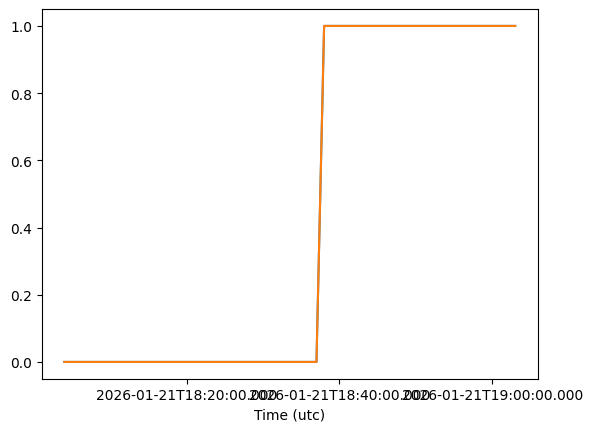

In [13]:
with time_support():
    plt.plot(times, start_vis)
    plt.plot(times, end_vis)
    plt.show();

In [14]:
# 3I/ATLAS
calculate_roll(
    ra=124.52978,
    dec=17.24129,
    obs_time=Time('2026-01-21T18:38:00Z', format='isot', scale='utc')
)

np.float64(18.466595775291868)

## Targets for Fun

In [ ]:
# Define start and stop times
tstart = Time("2026-01-21T18:15:00.000")
tstop = Time("2026-01-22T05:12:00.000")  # Example stop time

# Calculate times with a step of 1 minute
deltas = np.arange(0, (tstop - tstart).to_value(u.min), 1) * u.min
times = tstart + TimeDelta(deltas)

# Use these times with your Visibility module
state = vis.get_state(times)# Define start and stop times

In [39]:
# Target coords
target_coord = SkyCoord(
    ra=81.0458 * u.deg,
    dec=-24.5242 * u.deg,
)

# calculate the visibilities of the target at our specified times
fun_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

81.0458
-24.5242


In [40]:
df_fun = pd.DataFrame({'time': times, 'target': fun_vis})

In [41]:
print(df_fun)

                        time  target
0    2026-01-21T18:15:00.000    True
1    2026-01-21T18:16:00.000    True
2    2026-01-21T18:17:00.000    True
3    2026-01-21T18:18:00.000    True
4    2026-01-21T18:19:00.000    True
5    2026-01-21T18:20:00.000    True
6    2026-01-21T18:21:00.000    True
7    2026-01-21T18:22:00.000    True
8    2026-01-21T18:23:00.000    True
9    2026-01-21T18:24:00.000    True
10   2026-01-21T18:25:00.000    True
11   2026-01-21T18:26:00.000    True
12   2026-01-21T18:27:00.000    True
13   2026-01-21T18:28:00.000    True
14   2026-01-21T18:29:00.000    True
15   2026-01-21T18:30:00.000    True
16   2026-01-21T18:31:00.000    True
17   2026-01-21T18:32:00.000    True
18   2026-01-21T18:33:00.000    True
19   2026-01-21T18:34:00.000    True
20   2026-01-21T18:35:00.000    True
21   2026-01-21T18:36:00.000    True
22   2026-01-21T18:37:00.000    True
23   2026-01-21T18:38:00.000    True
24   2026-01-21T18:39:00.000    True
25   2026-01-21T18:40:00.000    True
2

In [73]:
# Fun target
roll = calculate_roll(
    ra=285.679298,
    dec=50.241484,
    obs_time=Time('2026-01-21T23:15:00Z', format='isot', scale='utc')
)
print(roll)

17.939176840542327


In [74]:
seq_roll = (roll + 180) % 360 - 180
print(seq_roll)

17.93917684054233


In [284]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Your RA and Dec
ra = 117.57057608545425   # degrees
dec = 8.733698238186177  # degrees

# Create SkyCoord object in ICRS (J2000)
coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')

# Get Cartesian unit vector representation
cart = coord.cartesian

# Extract X, Y, Z components
x = cart.x.value
y = cart.y.value
z = cart.z.value

print(f"TARG_X = {x:.12f}")
print(f"TARG_Y = {y:.12f}")
print(f"TARG_Z = {z:.12f}")

TARG_X = -0.457474114927
TARG_Y = 0.876162878109
TARG_Z = 0.151842171995


## One-off bright target in CVZ

In [73]:
# file: gaia_dr3_bp_bright_cone.py

from astroquery.gaia import Gaia
from astropy.table import Table

RA_DEG = 100.0
DEC_DEG = 10
RADIUS_DEG = 3.0
BP_LIMIT = 9

query = f"""
SELECT
    source_id,
    ra,
    dec,
    phot_bp_mean_mag,
    phot_g_mean_mag,
    phot_rp_mean_mag,
    parallax
FROM gaiadr3.gaia_source
WHERE phot_bp_mean_mag < {BP_LIMIT}
AND CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', {RA_DEG}, {DEC_DEG}, {RADIUS_DEG})
) = 1
"""

job = Gaia.launch_job_async(query)
results: Table = job.get_results()

# print(results)
df_gaia = results.to_pandas()
print(df_gaia)


INFO: Query finished. [astroquery.utils.tap.core]
               source_id          ra        dec  phot_bp_mean_mag  \
0    3134394088117360384  101.342647   8.835563          8.186040   
1    3326058240650587264   99.290884   7.978214          8.918569   
2    3327563059754786048   97.078510  10.303702          6.404807   
3    3328064024738995456   99.005519  11.327039          8.942830   
4    3328124600957022592   98.096990  11.673356          6.317203   
5    3351909270848425984   99.512573  11.685291          7.721828   
6    3351945623453063936  100.579413  11.486750          8.538740   
7    3352340210688631296   99.878348  12.904501          7.844412   
8    3325977357827120512   98.819037   8.003835          8.181076   
9    3326716813754146176  100.119099   9.817837          8.035895   
10   3326740693772848896  100.257818   9.879997          8.969646   
11   3326894591039911936   99.796481   9.645986          7.691583   
12   3327501280945096064   97.592755  10.129211      

In [24]:
# Define start and stop times
tstart = Time("2026-01-28T18:08:00.000")
tstop = Time("2026-01-28T18:35:00.000")
# tstop = Time("2026-01-30T12:00:00.000")

# Calculate times with a step of 1 minute
deltas = np.arange(0, (tstop - tstart).to_value(u.min), 1) * u.min
times = tstart + TimeDelta(deltas)

# Use these times with your Visibility module
state = vis.get_state(times)

In [66]:
# HD 48210
target_coord = SkyCoord(
    ra=100.67282318432785 * u.deg,
    dec=10.331479577433784 * u.deg,
    pm_ra_cosdec=-21.14791933097962 * u.mas / u.year,
    pm_dec=-26.37009479303108 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=4.697335267090021 * u.mas, allow_negative=True),
    radial_velocity=29.928106 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

100.67276301066188
10.331405761252013


In [67]:
print(targ_vis)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [630]:
200*0.2

40.0

In [631]:
400*0.2

80.0

In [68]:
2000*0.2/60

6.666666666666667

In [71]:
# Random
target_coord = SkyCoord(
    ra=160 * u.deg,
    dec=10 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

In [72]:
print(targ_vis)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [298]:
print(len(targ_vis) == sum(targ_vis))

True


In [545]:
df_single = pd.DataFrame({'time': times, 'target': targ_vis})

In [546]:
print(df_single)

                       time  target
0   2026-01-27T21:06:00.000    True
1   2026-01-27T21:07:00.000    True
2   2026-01-27T21:08:00.000    True
3   2026-01-27T21:09:00.000    True
4   2026-01-27T21:10:00.000    True
5   2026-01-27T21:11:00.000    True
6   2026-01-27T21:12:00.000    True
7   2026-01-27T21:13:00.000    True
8   2026-01-27T21:14:00.000    True
9   2026-01-27T21:15:00.000    True
10  2026-01-27T21:16:00.000    True
11  2026-01-27T21:17:00.000    True
12  2026-01-27T21:18:00.000    True
13  2026-01-27T21:19:00.000    True
14  2026-01-27T21:20:00.000    True
15  2026-01-27T21:21:00.000    True
16  2026-01-27T21:22:00.000    True
17  2026-01-27T21:23:00.000    True
18  2026-01-27T21:24:00.000    True
19  2026-01-27T21:25:00.000    True
20  2026-01-27T21:26:00.000    True
21  2026-01-27T21:27:00.000    True
22  2026-01-27T21:28:00.000    True
23  2026-01-27T21:29:00.000    True
24  2026-01-27T21:30:00.000    True
25  2026-01-27T21:31:00.000   False
26  2026-01-27T21:32:00.000 

In [129]:
# Single target
roll = calculate_roll(
    ra=124.53368471859308,
    dec=-68.31555837576165,
    obs_time=Time('2026-01-24T23:42:00Z', format='isot', scale='utc')
)
print(roll)

357.69099289033676


In [130]:
seq_roll = (roll + 180) % 360 - 180
print(seq_roll)

-2.3090071096632983


In [128]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Your RA and Dec
ra = 124.53368471859308   # degrees
dec = -68.31555837576165  # degrees

# Create SkyCoord object in ICRS (J2000)
coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')

# Get Cartesian unit vector representation
cart = coord.cartesian

# Extract X, Y, Z components
x = cart.x.value
y = cart.y.value
z = cart.z.value

print(f"TARG_X = {x:.12f}")
print(f"TARG_Y = {y:.12f}")
print(f"TARG_Z = {z:.12f}")

TARG_X = -0.209462944806
TARG_Y = 0.304386953981
TARG_Z = -0.929232940117


### Target Library

In [586]:
# Define start and stop times
tstart = Time("2026-01-27T22:41:00.000")
tstop = Time("2026-01-28T00:05:00.000")
# tstop = Time("2026-01-30T12:00:00.000")

# Calculate times with a step of 1 minute
deltas = np.arange(0, (tstop - tstart).to_value(u.min), 1) * u.min
times = tstart + TimeDelta(deltas)

# Use these times with your Visibility module
state = vis.get_state(times)

#### Fun Targets

In [560]:
# M83
target_coord = SkyCoord(
    ra=204.25 * u.deg,
    dec=-29.86 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

204.25
-29.86


In [562]:
# Crab Nebula
target_coord = SkyCoord(
    ra=83.6333 * u.deg,
    dec=22.0144 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

83.6333
22.0144


In [563]:
# Orion Nebula
target_coord = SkyCoord(
    ra=83.8201 * u.deg,
    dec=-05.3876 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

83.8201
-5.3876


#### Stars

In [564]:
# 55 Cnc
target_coord = SkyCoord(
    ra=133.1467606208 * u.deg,
    dec=28.3297830004 * u.deg,
    pm_ra_cosdec=-485.872 * u.mas / u.year,
    pm_dec=-233.651 * u.mas / u.year,
    obstime=Time.strptime("2015", "%Y"),
    distance=Distance(parallax=79.4482 * u.mas, allow_negative=True),
    radial_velocity=27.19 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

133.14506266555537
28.329064250399778


In [358]:
# HD 237840
target_coord = SkyCoord(
    ra=147.22890080684107 * u.deg,
    dec=55.12784606376827 * u.deg,
    pm_ra_cosdec=-7.356671450286832 * u.mas / u.year,
    pm_dec=3.453459648124932 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=0.9547534833614049 * u.mas, allow_negative=True),
    radial_velocity=4.835005 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

147.22886479862083
55.127855728246004


In [587]:
# HD 104470
target_coord = SkyCoord(
    ra=180.44463416429303 * u.deg,
    dec=-32.22966594183789 * u.deg,
    pm_ra_cosdec=-54.78578598319984 * u.mas / u.year,
    pm_dec=3.759795533068549 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=4.910061112333302 * u.mas, allow_negative=True),
    radial_velocity=-10.412613 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

180.44445291163123
-32.22965541945888


In [495]:
# HD 47679
target_coord = SkyCoord(
    ra=100.23619889363677 * u.deg,
    dec=23.174966238984318 * u.deg,
    pm_ra_cosdec=0.8122076441226865 * u.mas / u.year,
    pm_dec=-3.7243187023256175 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=0.9901647925438399 * u.mas, allow_negative=True),
    radial_velocity=9.118548 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

100.23620136615706
23.174955816280264


In [657]:
# HD 42416
target_coord = SkyCoord(
    ra=92.3863957130446 * u.deg,
    dec=-25.275426506831373 * u.deg,
    pm_ra_cosdec=23.064441068726687 * u.mas / u.year,
    pm_dec=21.805451064648228 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=10.295363084569532 * u.mas, allow_negative=True),
    radial_velocity=33.200138 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

92.3864671101092
-25.275365469024347


In [606]:
# HD 29078
target_coord = SkyCoord(
    ra=68.0190794753464 * u.deg,
    dec=-49.94780165252183 * u.deg,
    pm_ra_cosdec=-5.496601882197276 * u.mas / u.year,
    pm_dec=22.87880733323302 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=7.868123950309237 * u.mas, allow_negative=True),
    radial_velocity=0.34909597 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

68.01905556973243
-49.94773762330625


In [558]:
# HD 102044
target_coord = SkyCoord(
    ra=176.25237017765485 * u.deg,
    dec=69.93128537292165 * u.deg,
    pm_ra_cosdec=-20.44798052377138 * u.mas / u.year,
    pm_dec=-8.867498450772759 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=3.5623369761791444 * u.mas, allow_negative=True),
    radial_velocity=-6.4117975 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

176.25220340976497
69.93126055616317


In [589]:
# HD 67125
target_coord = SkyCoord(
    ra=121.21191232063362 * u.deg,
    dec=-42.11049559790795 * u.deg,
    pm_ra_cosdec=-23.32674304031457 * u.mas / u.year,
    pm_dec=3.445036509744885 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=3.0116448800421063 * u.mas, allow_negative=True),
    radial_velocity=45.89624 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

121.21182432121984
-42.110485956533495


In [653]:
# HD 29078
target_coord = SkyCoord(
    ra=68.0190794753464 * u.deg,
    dec=-49.94780165252183 * u.deg,
    pm_ra_cosdec=-5.496601882197276 * u.mas / u.year,
    pm_dec=22.87880733323302 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=7.868123950309237 * u.mas, allow_negative=True),
    radial_velocity=0.34909597 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

68.01905556477476
-49.947737610027524


In [654]:
# HD 102044
target_coord = SkyCoord(
    ra=176.25237017765485 * u.deg,
    dec=69.93128537292165 * u.deg,
    pm_ra_cosdec=-20.44798052377138 * u.mas / u.year,
    pm_dec=-8.867498450772759 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=3.5623369761791444 * u.mas, allow_negative=True),
    radial_velocity=-6.4117975 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

176.2522033742651
69.93126055088038


In [655]:
# HD 67125
target_coord = SkyCoord(
    ra=121.21191232063362 * u.deg,
    dec=-42.11049559790795 * u.deg,
    pm_ra_cosdec=-23.32674304031457 * u.mas / u.year,
    pm_dec=3.445036509744885 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=3.0116448800421063 * u.mas, allow_negative=True),
    radial_velocity=45.89624 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

121.21182430277985
-42.110485954513166


In [25]:
# HD 87211
target_coord = SkyCoord(
    ra=150.9698590193025 * u.deg,
    dec=18.950833098551556 * u.deg,
    pm_ra_cosdec=-180.43170284806754 * u.mas / u.year,
    pm_dec=-53.95087895533592 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=13.777495626090223 * u.mas, allow_negative=True),
    radial_velocity=53.761295 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

150.96932500789327
18.950682077665547


In [26]:
# HD 71961
target_coord = SkyCoord(
    ra=127.38829931701376 * u.deg,
    dec=-21.280810356792315 * u.deg,
    pm_ra_cosdec=1.7427461696367506 * u.mas / u.year,
    pm_dec=2.720359499885236 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=1.1442602572362661 * u.mas, allow_negative=True),
    radial_velocity=-2.4071023 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

127.38830455235596
-21.280802741861635


In [658]:
print(targ_vis)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False]


### Lance Special Vis Calc

In [6]:
# Define start and stop times
tstart = Time("2026-01-24T19:40:00.000")
tstop = Time("2026-01-25T12:00:00.000")  # Example stop time

# Calculate times with a step of 1 minute
deltas = np.arange(0, (tstop - tstart).to_value(u.min), 1) * u.min
times = tstart + TimeDelta(deltas)

# Use these times with your Visibility module
state = vis.get_state(times)

In [9]:
# Special targ 1
target_coord = SkyCoord(
    ra=80.85025565685216 * u.deg,
    dec=-39.67839006974714 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ1_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

80.85025565685216
-39.67839006974714


In [10]:
# Special targ 2
target_coord = SkyCoord(
    ra=54.85575860006466 * u.deg,
    dec=-10.437728317741014 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ2_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

54.85575860006466
-10.437728317741014


In [11]:
# Special targ 3
target_coord = SkyCoord(
    ra=46.598690564643306 * u.deg,
    dec=13.186974198471711 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ3_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

46.598690564643306
13.186974198471711


In [12]:
# Special targ 4
target_coord = SkyCoord(
    ra=32.122789791801274 * u.deg,
    dec=37.85889348019886 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ4_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

32.122789791801274
37.85889348019886


In [13]:
# Special targ 5
target_coord = SkyCoord(
    ra=302.2225209056655 * u.deg,
    dec=77.7115303856395 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ5_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

302.2225209056655
77.7115303856395


In [14]:
# Special targ 6
target_coord = SkyCoord(
    ra=167.31973547875617 * u.deg,
    dec=51.37897123000413 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ6_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

167.31973547875617
51.37897123000413


In [15]:
# Special targ 7
target_coord = SkyCoord(
    ra=154.30857900053857 * u.deg,
    dec=23.105782078789723 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ7_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

154.30857900053857
23.105782078789723


In [16]:
# Special targ 8
target_coord = SkyCoord(
    ra=165.14025819077432 * u.deg,
    dec=3.617427696037374 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ8_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

165.14025819077432
3.617427696037374


In [17]:
# Special targ 9
target_coord = SkyCoord(
    ra=72.2697223418202 * u.deg,
    dec=-56.666478722619395 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ9_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

72.2697223418202
-56.666478722619395


In [18]:
# Special targ 10
target_coord = SkyCoord(
    ra=74.96033039650118 * u.deg,
    dec=-10.263907242637888 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ10_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

74.96033039650118
-10.263907242637888


In [20]:
# Special targ 11
target_coord = SkyCoord(
    ra=32.35592231219954 * u.deg,
    dec=-10.263907242637888 * u.deg,
)

# calculate the visibilities of the target at our specified times
targ11_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

32.35592231219954
-10.263907242637888


In [21]:
df_special = pd.DataFrame({'time': times, 'targ1_vis': targ1_vis, 'targ2_vis': targ2_vis, 'targ3_vis': targ3_vis, 'targ4_vis': targ4_vis, 'targ5_vis': targ5_vis, 'targ6_vis': targ6_vis, 'targ7_vis': targ7_vis, 'targ8_vis': targ8_vis, 'targ9_vis': targ9_vis})

In [25]:
print(df_special)

                        time  targ1_vis  targ2_vis  targ3_vis  targ4_vis  \
0    2026-01-24T19:40:00.000      False      False      False       True   
1    2026-01-24T19:41:00.000      False      False      False       True   
2    2026-01-24T19:42:00.000      False      False      False      False   
3    2026-01-24T19:43:00.000      False      False      False      False   
4    2026-01-24T19:44:00.000      False      False      False      False   
5    2026-01-24T19:45:00.000      False      False      False      False   
6    2026-01-24T19:46:00.000      False      False      False      False   
7    2026-01-24T19:47:00.000      False      False      False      False   
8    2026-01-24T19:48:00.000      False      False      False      False   
9    2026-01-24T19:49:00.000      False      False      False      False   
10   2026-01-24T19:50:00.000      False      False      False      False   
11   2026-01-24T19:51:00.000      False      False      False      False   
12   2026-01